In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import datasets

dataset = datasets.load_iris()

In [30]:
print("Keys of the dataset: {}".format(dataset.keys()))

Keys of the dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [32]:
print("Target names: {}".format(dataset.target_names))

Target names: ['setosa' 'versicolor' 'virginica']


In [34]:
print("Feature names: {}".format(dataset.feature_names))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [36]:
print("Shape of data: {}".format(dataset.data.shape))

Shape of data: (150, 4)


In [38]:
print("First five samples:\n {}".format(dataset.data[:5]))

First five samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [40]:
print("Shape of target: {}".format(dataset.target.shape))

Shape of target: (150,)


In [42]:
print("Target:\n {}".format(dataset.target))

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=0, stratify=dataset.target)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Execution time: {} seconds".format(time.time() - start_time))
print("Test set predictions:\n {}".format(y_pred))
print("Test set score:\n {:.3f}".format(knn.score(X_test, y_test)))


Execution time: 0.003989696502685547 seconds
Test set predictions:
 [2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2]
Test set score:
 1.000


In [47]:
from knn import knn_classifier
start_time = time.time()
y_pred = knn_classifier(X_train, y_train, X_test, 3)
print("Execution time: {} seconds".format(time.time() - start_time))
print("Test set predictions:\n {}".format(y_pred))
print("Test set score:\n {:.3f}".format(np.mean(y_pred == y_test)))

Execution time: 0.02094268798828125 seconds
Test set predictions:
 [2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2]
Test set score:
 1.000


Wall time: 808 ms


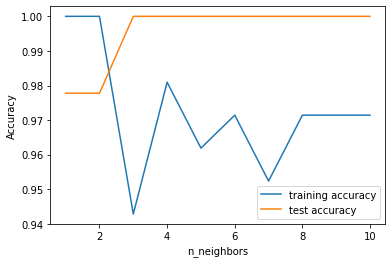

In [48]:
%%time
training_accuracy = []
test_accuracy = []
neighbors = range(1,11)
for n_neighbors in neighbors:
    train_pred = knn_classifier(X_train, y_train, X_train, n_neighbors)
    training_accuracy.append(np.mean(train_pred == y_train))
    test_pred = knn_classifier(X_train, y_train, X_test, n_neighbors)
    test_accuracy.append(np.mean(test_pred == y_test))

plt.plot(neighbors, training_accuracy, label='training accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
